# CO<sub>2</sub> Territorial Emissions in Mt

<hr>

**CO<sub>2</sub> Territorial Emissions** are carbon dioxide emissions attributed to the country in which they physically occur.

## Import required libraries

In [76]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib
import randomcolor
from IPython.display import HTML

rand_color = randomcolor.RandomColor()

In [134]:
animation.rcParams['animation.embed_limit'] = 2**128

plt.style.use('dark_background')

def draw_barchart_race(fig, ax, df, timedelta='D', timeunit='D', interval=250, title='Title', xlabel='Label'):
    items = df['item'].unique().tolist()
    colors = dict(zip(items, rand_color.generate(luminosity='luminosity', count=len(items))))

    df.dropna(inplace=True)
    df = df.set_index('time')
    df = df.groupby('item').resample(timedelta).mean()
    df['value'] = df['value'].interpolate()

    def draw(time):
        ax.clear()
        
        time_plot_df = df[df.index.isin([time], level=1)].sort_values(by='value', ascending=True).tail(10)
        time_plot_df = time_plot_df.reset_index()
        label = np.datetime_as_string(time, unit=timeunit)

        draw_barchart_date(ax, time_plot_df, title=title, label=label, xlabel=xlabel, colors=colors)

    frames = df.index.to_frame()['time'].unique()
    animator = animation.FuncAnimation(fig, draw, frames=frames, interval=interval)
    return animator


def draw_barchart_date(ax, df, title='Title', label='Label', xlabel='Label', colors={}):
    labelsize = 12
    textcolor = 'white'
    
    ax.text(0, 1.06, xlabel, transform=ax.transAxes,
            size=labelsize, color=textcolor)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors=textcolor, labelsize=labelsize)
    ax.set_yticks([])
    ax.set_axisbelow(True)
    ax.text(0, 1.15, title, transform=ax.transAxes,
            size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'Data Show', transform=ax.transAxes, color=textcolor, ha='right', size=16)
    plt.box(False)
    ax.barh(df['item'], df['value'], color=[
           colors[item] if item in colors.keys() else '#8383fc' for item in df['item']], alpha=0.8)
    
    dx = df['value'].max() / 100
    for i, (value, item) in enumerate(zip(df['value'], df['item'])):
        ax.text(
            value - dx, i,
            item,
            size=16,
            weight=600,
            ha='right',
            va='center'
        )
        ax.text(
            value + dx,
            i,
            f'{value: ,.0f}',
            size=16,
            ha='left',
            va='center'
        )

    ax.text(1, 0.06, label, transform=ax.transAxes,
            color=textcolor, size=60, ha='right', weight=800)
    
    return ax

## Data pre-processing

In [135]:
df = pd.read_csv('Data/co2_territorial_emissions_Mt.csv', 
                 sep=';',
                 skiprows=1)

## Cleaning

In [136]:
df.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
df.drop(df.index[59:], inplace=True)

df = df.melt(id_vars = ['year'], 
             value_vars = df[df.columns[1:]], 
             var_name = 'country',
             value_name = 'co2_territorial_emissions_Mt')

df['co2_territorial_emissions_Mt'] = df['co2_territorial_emissions_Mt'].astype(float)

df

year      country  co2_territorial_emissions_Mt
0      1960  Afghanistan                       0.41388
1      1961  Afghanistan                       0.49080
2      1962  Afghanistan                       0.68859
3      1963  Afghanistan                       0.70674
4      1964  Afghanistan                       0.83855
...     ...          ...                           ...
13034  2014     Zimbabwe                      11.96160
13035  2015     Zimbabwe                      12.16310
13036  2016     Zimbabwe                      10.80740
13037  2017     Zimbabwe                      12.02590
13038  2018     Zimbabwe                      12.26270

[13039 rows x 3 columns]

## Barchart

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


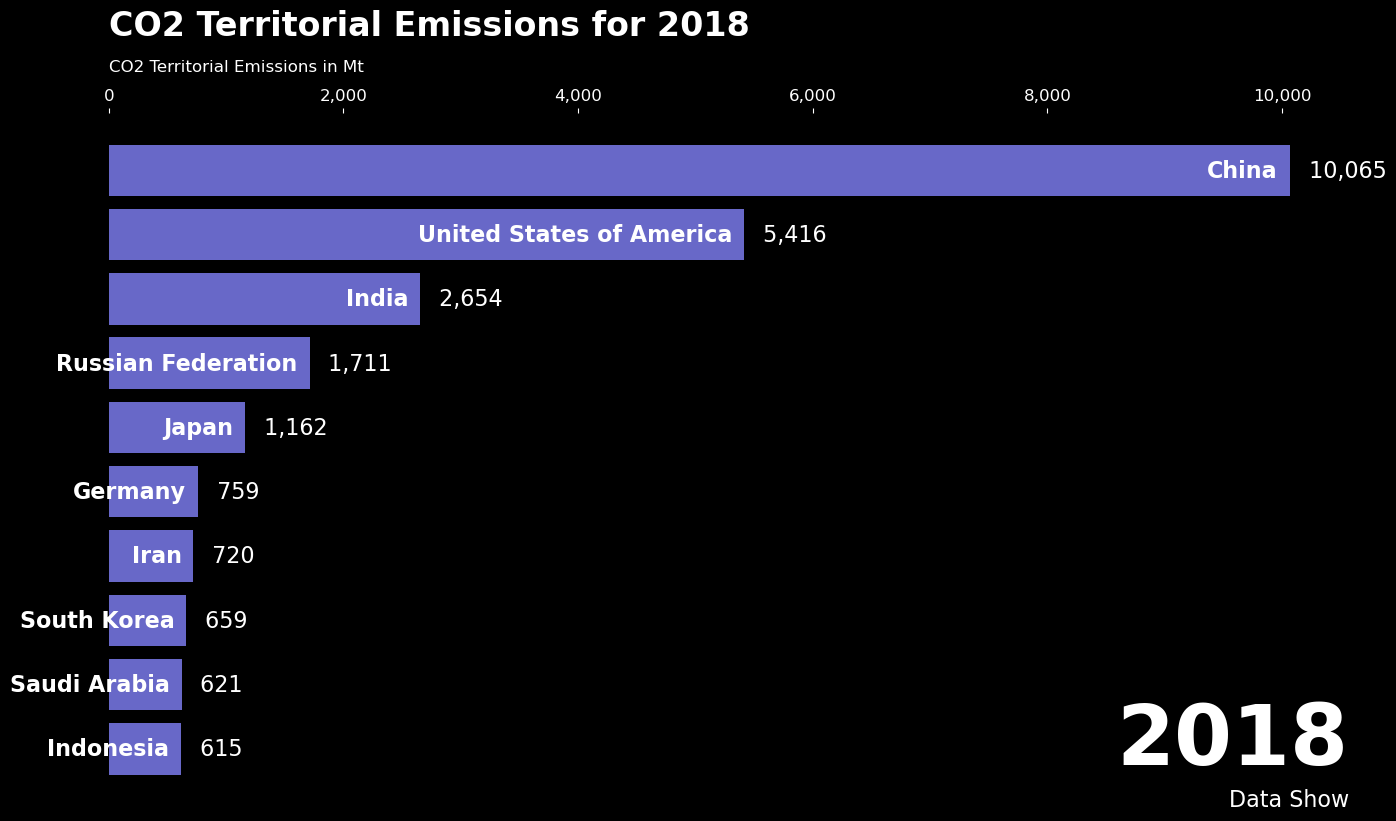

In [137]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.clear()
year = '2018'
date = np.datetime64(year)

chart_df = df.copy()
chart_df['year'] = pd.to_datetime(chart_df['year'])
chart_df.rename(columns={'year': 'time', 'country': 'item', 'co2_territorial_emissions_Mt': 'value'}, inplace=True)

time_plot_df = chart_df[chart_df['time'].eq(date)]
time_plot_df.dropna(inplace=True)
time_plot_df = time_plot_df.sort_values(by='value', ascending=True).tail(10)

draw_barchart_date(ax, time_plot_df,
                   title='CO2 Territorial Emissions for 2018',
                   label=year,
                   xlabel='CO2 Territorial Emissions in Mt')

## Animation

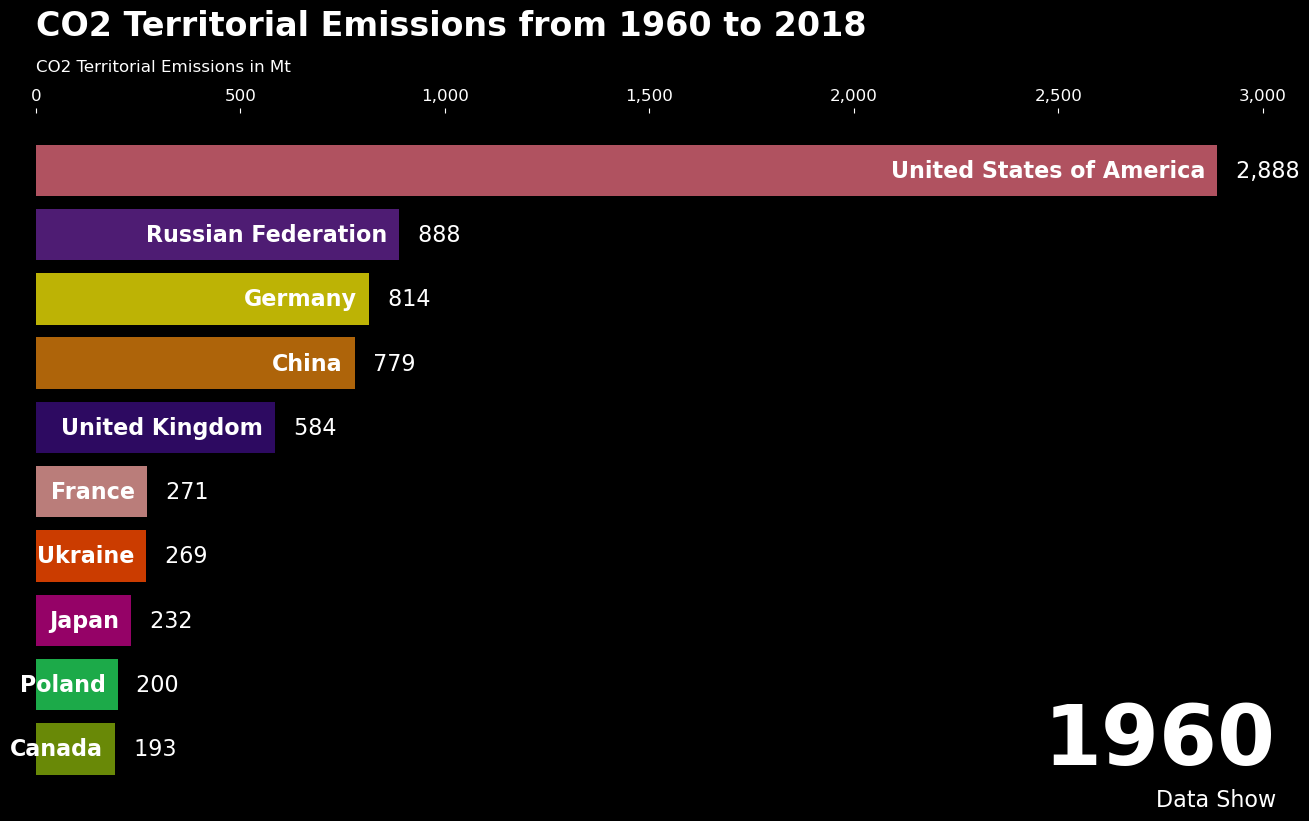

In [154]:
fig, ax = plt.subplots(figsize=(16, 9))

interval = 500
animator = draw_barchart_race(fig, ax,
                              chart_df,
                              timedelta='Y',
                              timeunit='Y',
                              interval=interval,
                              title='CO2 Territorial Emissions from 1960 to 2018',
                              xlabel='CO2 Territorial Emissions in Mt')

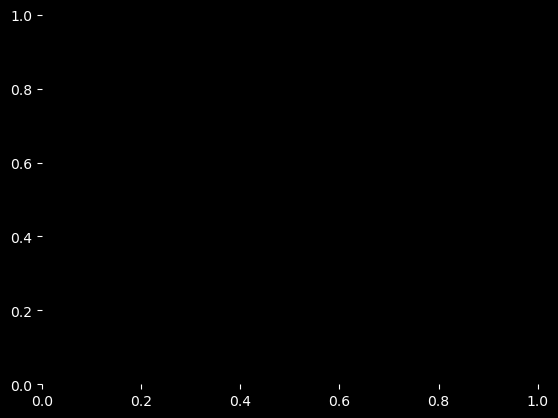

In [155]:
HTML(animator.to_jshtml())

## Files

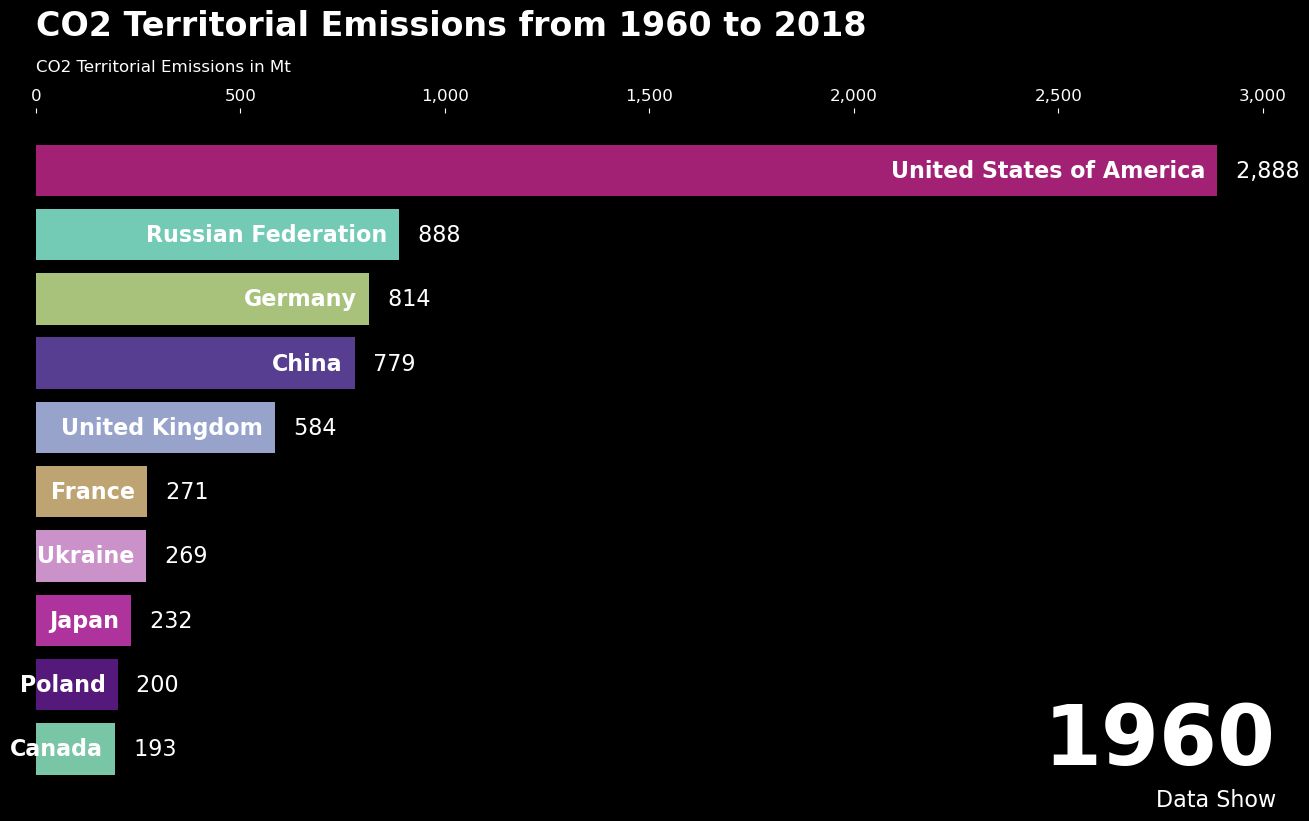

In [159]:
fig, ax = plt.subplots(figsize=(16, 9))

interval = 50
fps = 1000 / interval
animator = draw_barchart_race(fig, ax,
                              chart_df,
                              timedelta='W',
                              timeunit='Y',
                              interval=interval,
                              title='CO2 Territorial Emissions from 1960 to 2018',
                              xlabel='CO2 Territorial Emissions in Mt')

## Video

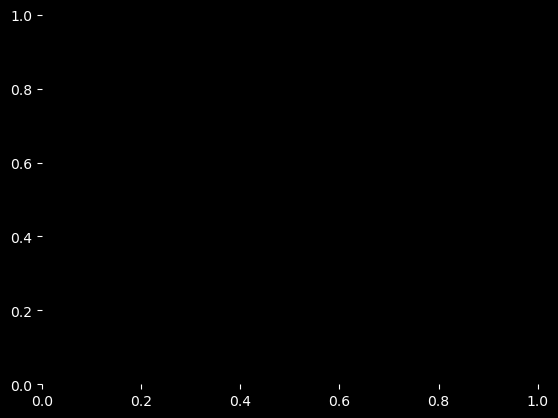

In [160]:
bitrate = 500
codec = 'libx264'

writer = animation.FFMpegWriter(fps=fps, bitrate=bitrate, codec=codec, extra_args=['-pix_fmt', 'yuv420p', '-preset', 'fast'])
animator.save('./CO2 Territorial Emissions in Mt.mkv', writer=writer)